In [391]:
from urllib.request import urlretrieve
import pandas as pd
import plotly.express as px
import plotly.io as pio
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import nbformat
import numpy as np
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [392]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [393]:
urlretrieve(medical_charges_url, 'medical.csv')
medical_df = pd.read_csv('medical.csv')
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


This dataset contains 1338 rows and 7 columns. Each row contains data about one customer each. 
We have to find the value of the charges columns using the data in the other columns.

In [394]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


There are no null values in any of the columns

In [395]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [396]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

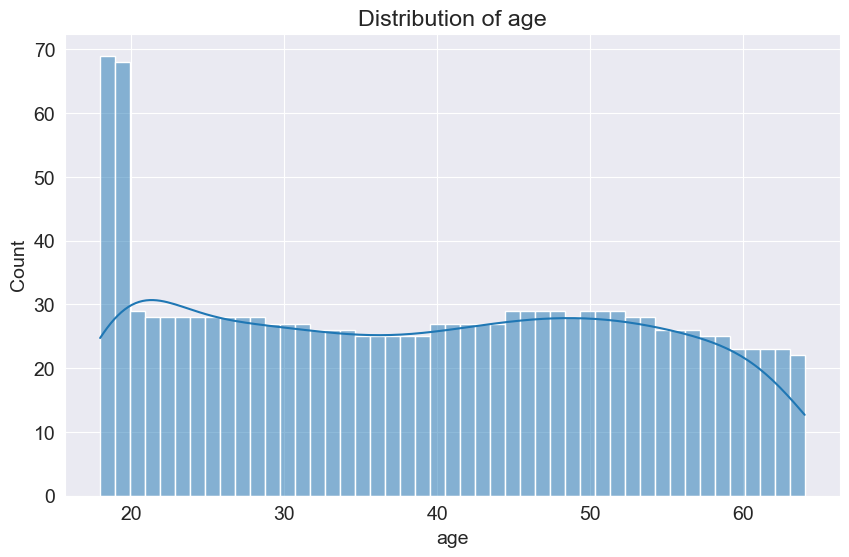

In [397]:
sns.histplot(data=medical_df, 
             x='age', 
             bins=47, 
             kde=True)
plt.title('Distribution of age')
plt.show()

In [398]:
medical_df.bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

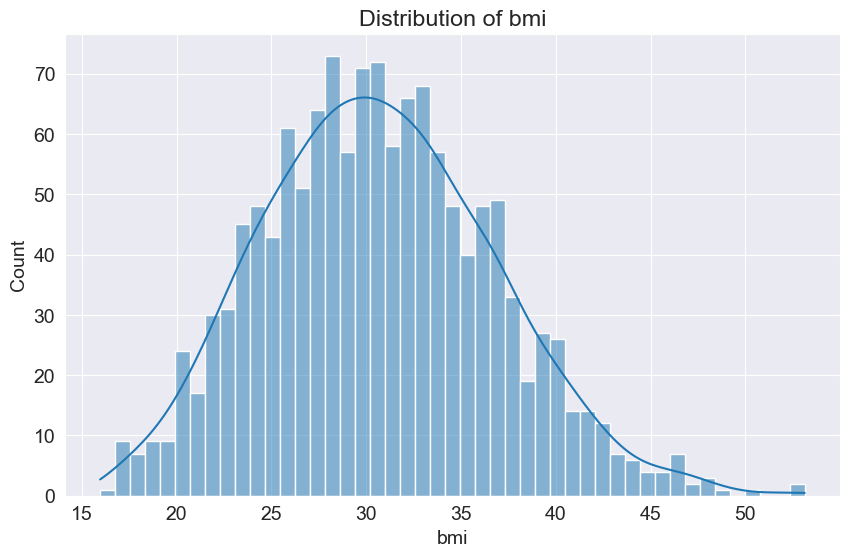

In [399]:
sns.histplot(data=medical_df, 
             x='bmi', 
             bins=47, 
             kde=True)
plt.title('Distribution of bmi')
plt.show()

In [400]:
medical_df.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

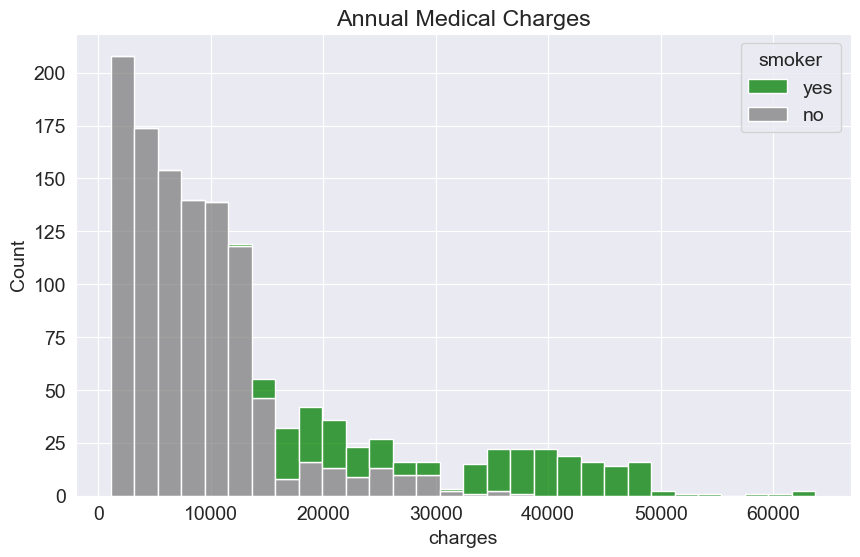

In [401]:
fig, ax = plt.subplots()
sns.histplot(data = medical_df,
             x = 'charges',
             hue = 'smoker',
             multiple = 'stack',
             palette = ['green','grey'],
             ax = ax)

ax.set_title('Annual Medical Charges')
plt.show()

In [402]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

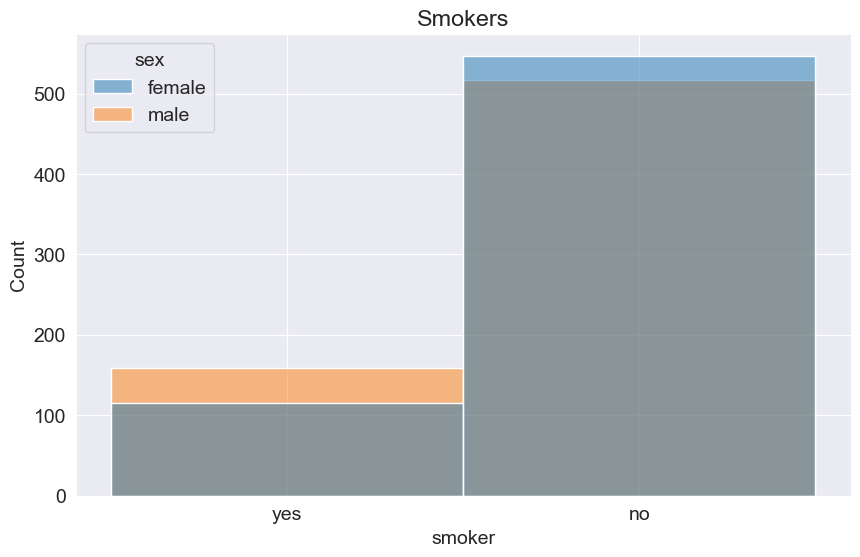

In [403]:
sns.histplot(data = medical_df,
             x = 'smoker',
             hue = 'sex',)

plt.title('Smokers')
plt.show()

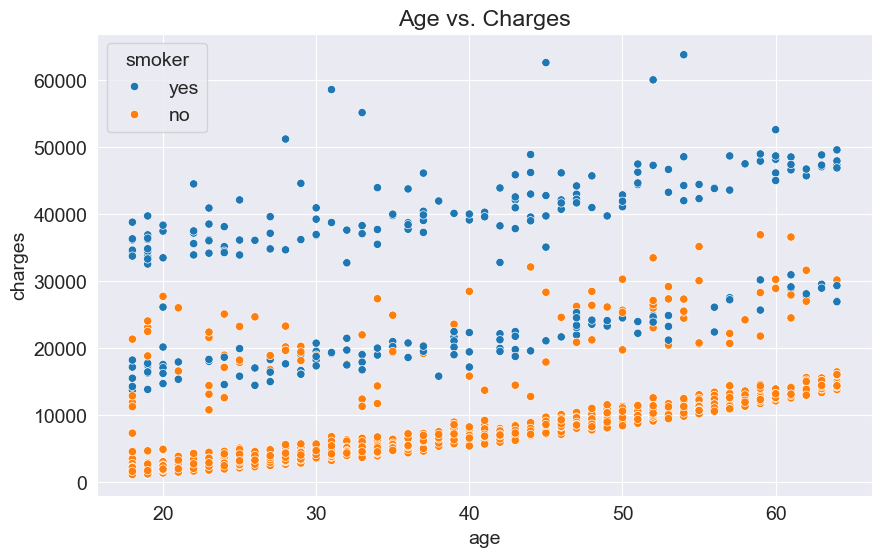

In [404]:
sns.scatterplot(data=medical_df,
                x = 'age',
                y = 'charges',
                hue = 'smoker')
plt.title('Age vs. Charges')
plt.show()

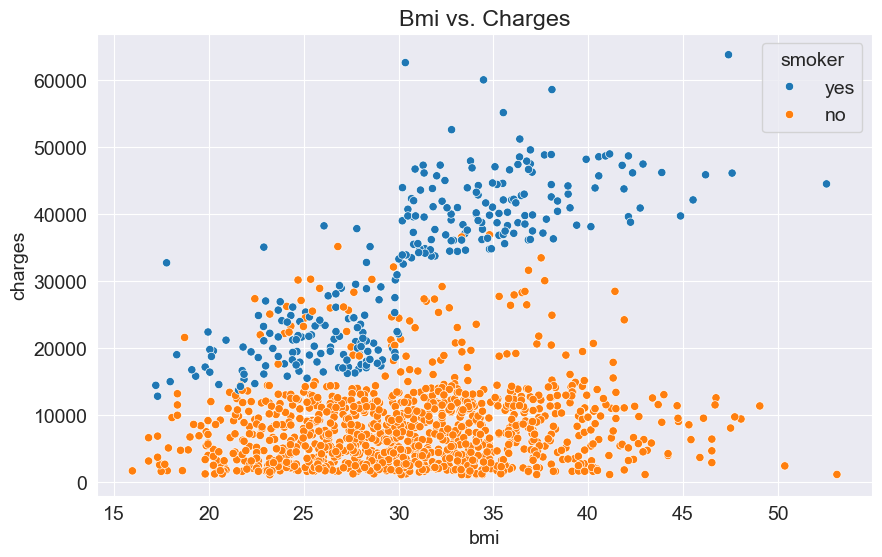

In [405]:
sns.scatterplot(data=medical_df,
                x = 'bmi',
                y = 'charges',
                hue = 'smoker')
plt.title('Bmi vs. Charges')
plt.show()

Correlation Coefficients
1. charges with age grow together
2. charges with bmi do not grow together

In [406]:
medical_df.charges.corr(medical_df.age)

0.2990081933306478

In [407]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362887

Computing the correlation coefficient with categorical columns, they must be converted to numerical values.
We can use dictionary for that.
The greater the value of correlation coefficient, the stronger the relationship.

In [408]:
smoker_values = {
  'no': 0,
  'yes': 1
}

medical_df['smoker_numeric'] = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(medical_df.smoker_numeric)

0.7872514304984778

Below is the correlation of all columns with other columns

In [409]:
medical_df = medical_df.select_dtypes(include=[np.number])
medical_df.corr()

,age,bmi,children,charges,smoker_numeric
age,1.000000,0.109272,0.042469,0.299008,-0.025019
bmi,0.109272,1.000000,0.012759,0.198341,0.003750
children,0.042469,0.012759,1.000000,0.067998,0.007673
charges,0.299008,0.198341,0.067998,1.000000,0.787251
smoker_numeric,-0.025019,0.003750,0.007673,0.787251,1.000000


Below is the correlation matrix

Text(0.5, 1.0, 'Correlation Matrix')

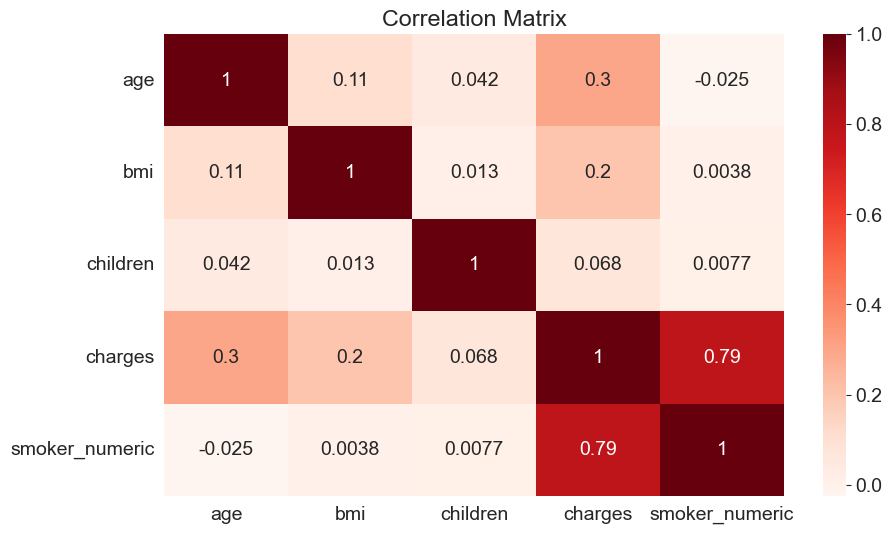

In [410]:
sns.heatmap(medical_df.corr(),
            cmap = 'Reds',
            annot = True)
plt.title('Correlation Matrix')